In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Airbnb_NYC_data_kaggle.csv")

In [3]:
df.head(3).T

,0,1,2
id,2539,2595,3647
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !
host_id,2787,2845,4632
host_name,John,Jennifer,Elisabeth
neighbourhood_group,Brooklyn,Manhattan,Manhattan
neighbourhood,Kensington,Midtown,Harlem
latitude,40.64749,40.75362,40.80902
longitude,-73.97237,-73.98377,-73.9419
room_type,Private room,Entire home/apt,Private room
price,149,225,150


In [4]:
df.shape

(48895, 16)

In [5]:
df['id'].value_counts()

2539        1
25583366    1
25551687    1
25552076    1
25554120    1
           ..
13121809    1
13122135    1
13122318    1
13122932    1
36487245    1
Name: id, Length: 48895, dtype: int64

In [6]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [7]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [8]:
df['room_type'] = df['room_type'].str.lower().str.replace(" ","_")

In [9]:
df['room_type'].value_counts()

entire_home/apt    25409
private_room       22326
shared_room         1160
Name: room_type, dtype: int64

<Axes: >

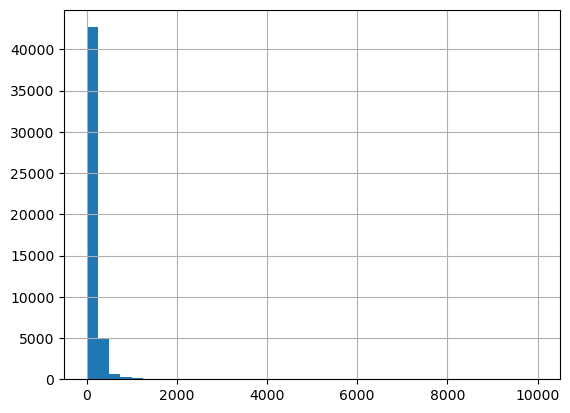

In [10]:
df['price'].hist(bins = 40)

<Axes: >

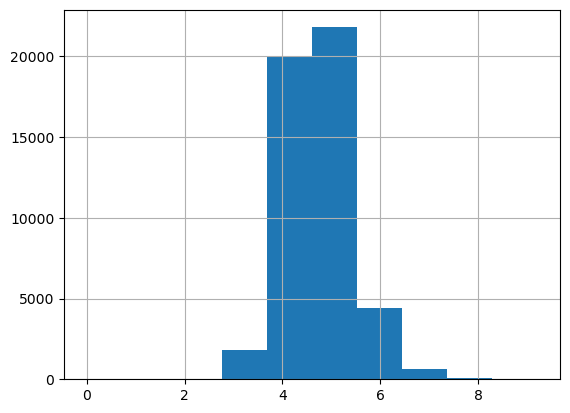

In [11]:
log_price = np.log1p(df['price'])
log_price.hist()

In [12]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [13]:
categorical = ['neighbourhood_group' , 'neighbourhood' , 'room_type']

In [14]:
categorical

['neighbourhood_group', 'neighbourhood', 'room_type']

In [15]:
df.dtypes == 'float64'

id                                False
name                              False
host_id                           False
host_name                         False
neighbourhood_group               False
neighbourhood                     False
latitude                           True
longitude                          True
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                       False
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [16]:
numerical = list(df.dtypes[(df.dtypes == 'float64') | (df.dtypes == 'int64')].index)

In [17]:
numerical

['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [18]:
numerical

['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [19]:
df_keep = df[categorical+numerical]

In [20]:
df_keep.fillna(0)

,neighbourhood_group,neighbourhood,room_type,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,private_room,2539,2787,40.64749,-73.97237,149,1,9,0.21,6,365
1,Manhattan,Midtown,entire_home/apt,2595,2845,40.75362,-73.98377,225,1,45,0.38,2,355
2,Manhattan,Harlem,private_room,3647,4632,40.80902,-73.94190,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,entire_home/apt,3831,4869,40.68514,-73.95976,89,1,270,4.64,1,194
4,Manhattan,East Harlem,entire_home/apt,5022,7192,40.79851,-73.94399,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,private_room,36484665,8232441,40.67853,-73.94995,70,2,0,0.00,2,9
48891,Brooklyn,Bushwick,private_room,36485057,6570630,40.70184,-73.93317,40,4,0,0.00,2,36
48892,Manhattan,Harlem,entire_home/apt,36485431,23492952,40.81475,-73.94867,115,10,0,0.00,1,27
48893,Manhattan,Hell's Kitchen,shared_room,36485609,30985759,40.75751,-73.99112,55,1,0,0.00,6,2


In [21]:
df_keep.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
room_type                             0
id                                    0
host_id                               0
latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [22]:
df_keep['reviews_per_month'] = df_keep['reviews_per_month'].replace(np.nan, 0)

C:\Users\12672\AppData\Local\Temp\ipykernel_7032\936314272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_keep['reviews_per_month'] = df_keep['reviews_per_month'].replace(np.nan, 0)


In [23]:
df_keep.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
room_type                         0
id                                0
host_id                           0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [24]:
df_keep['neighbourhood_group'] = df_keep['neighbourhood_group'].str.lower().str.replace(" ","_")

C:\Users\12672\AppData\Local\Temp\ipykernel_7032\3888541050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_keep['neighbourhood_group'] = df_keep['neighbourhood_group'].str.lower().str.replace(" ","_")


In [25]:
df_keep['neighbourhood_group'].value_counts()

manhattan        21661
brooklyn         20104
queens            5666
bronx             1091
staten_island      373
Name: neighbourhood_group, dtype: int64

In [26]:
del df_keep['neighbourhood']

In [27]:
df_keep.dtypes

neighbourhood_group                object
room_type                          object
id                                  int64
host_id                             int64
latitude                          float64
longitude                         float64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [28]:
df_keep.head(3).T

,0,1,2
neighbourhood_group,brooklyn,manhattan,manhattan
room_type,private_room,entire_home/apt,private_room
id,2539,2595,3647
host_id,2787,2845,4632
latitude,40.64749,40.75362,40.80902
longitude,-73.97237,-73.98377,-73.9419
price,149,225,150
minimum_nights,1,1,3
number_of_reviews,9,45,0
reviews_per_month,0.21,0.38,0.0


In [29]:
del df_keep['latitude']
del df_keep['longitude']

In [30]:
df_keep.head(3).T

,0,1,2
neighbourhood_group,brooklyn,manhattan,manhattan
room_type,private_room,entire_home/apt,private_room
id,2539,2595,3647
host_id,2787,2845,4632
price,149,225,150
minimum_nights,1,1,3
number_of_reviews,9,45,0
reviews_per_month,0.21,0.38,0.0
calculated_host_listings_count,6,2,1
availability_365,365,355,365


In [31]:
del df_keep['host_id']

In [32]:
df_keep.head(3).T

,0,1,2
neighbourhood_group,brooklyn,manhattan,manhattan
room_type,private_room,entire_home/apt,private_room
id,2539,2595,3647
price,149,225,150
minimum_nights,1,1,3
number_of_reviews,9,45,0
reviews_per_month,0.21,0.38,0.0
calculated_host_listings_count,6,2,1
availability_365,365,355,365


In [33]:
df_keep.isnull().sum()

neighbourhood_group               0
room_type                         0
id                                0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
df_, df_test = train_test_split(df_keep, test_size=0.2,
                               random_state = 1)
df_train, df_val = train_test_split(df_, test_size = 0.25, 
                                    random_state=1)

df_train.shape, df_test.shape, df_val.shape

((29337, 9), (9779, 9), (9779, 9))

In [35]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)



In [36]:
y_train = df_train['price']
y_test = df_test['price']
y_val = df_val['price']

In [37]:
del df_train['price']
del df_test['price']
del df_val['price']

In [38]:
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)
y_val = np.log1p(y_val)

In [44]:
from sklearn.feature_extraction import DictVectorizer

In [45]:
dv = DictVectorizer(sparse=False)

In [46]:
df_train_dicts = df_train.to_dict(orient="records")

In [50]:
X_train = dv.fit_transform(df_train_dicts)

In [51]:
dv.get_feature_names_out()

array(['availability_365', 'calculated_host_listings_count', 'id',
       'minimum_nights', 'neighbourhood_group=bronx',
       'neighbourhood_group=brooklyn', 'neighbourhood_group=manhattan',
       'neighbourhood_group=queens', 'neighbourhood_group=staten_island',
       'number_of_reviews', 'reviews_per_month',
       'room_type=entire_home/apt', 'room_type=private_room',
       'room_type=shared_room'], dtype=object)

In [52]:
#converted df_train to dictionary and did one hot encoding

##next step is to fit model, transform the df_val and check predictions

In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [55]:
model.fit(X_train, y_train)

LinearRegression()

In [56]:
y_pred = model.predict(X_train)

In [57]:
y_pred

array([5.0360876 , 4.18277978, 4.99293205, ..., 4.18864275, 5.25861727,
       5.48532124])

In [59]:
y_train

0        4.709530
1        4.262680
2        6.133398
3        4.605170
4        7.601402
           ...   
29332    4.653960
29333    4.248495
29334    3.931826
29335    5.525453
29336    5.393628
Name: price, Length: 29337, dtype: float64

In [60]:
from sklearn.metrics import mean_squared_error

In [61]:
mse = mean_squared_error(y_pred, y_train)

In [64]:
np.sqrt(mse)

0.5072824109679467

In [66]:
df_val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(df_val_dicts)

In [68]:
y_pred_val = model.predict(X_val)

In [70]:
np.sqrt(mean_squared_error(y_pred_val, y_val))

0.5038749108812693

In [71]:
df_keep

,neighbourhood_group,room_type,id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,brooklyn,private_room,2539,149,1,9,0.21,6,365
1,manhattan,entire_home/apt,2595,225,1,45,0.38,2,355
2,manhattan,private_room,3647,150,3,0,0.00,1,365
3,brooklyn,entire_home/apt,3831,89,1,270,4.64,1,194
4,manhattan,entire_home/apt,5022,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...
48890,brooklyn,private_room,36484665,70,2,0,0.00,2,9
48891,brooklyn,private_room,36485057,40,4,0,0.00,2,36
48892,manhattan,entire_home/apt,36485431,115,10,0,0.00,1,27
48893,manhattan,shared_room,36485609,55,1,0,0.00,6,2


In [74]:
df_keep['log_price'] = np.log1p(df_keep['price'])
df_keep.groupby('neighbourhood_group')['log_price'].mean()

C:\Users\12672\AppData\Local\Temp\ipykernel_7032\907629318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_keep['log_price'] = np.log1p(df_keep['price'])


neighbourhood_group
bronx            4.256669
brooklyn         4.576831
manhattan        5.007476
queens           4.385811
staten_island    4.387137
Name: log_price, dtype: float64

In [75]:
df_keep.groupby('room_type')['log_price'].mean()

room_type
entire_home/apt    5.147243
private_room       4.309790
shared_room        3.968368
Name: log_price, dtype: float64

In [76]:
del df_keep['neighbourhood_group']

In [77]:
df_keep

,room_type,id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,log_price
0,private_room,2539,149,1,9,0.21,6,365,5.010635
1,entire_home/apt,2595,225,1,45,0.38,2,355,5.420535
2,private_room,3647,150,3,0,0.00,1,365,5.017280
3,entire_home/apt,3831,89,1,270,4.64,1,194,4.499810
4,entire_home/apt,5022,80,10,9,0.10,1,0,4.394449
...,...,...,...,...,...,...,...,...,...
48890,private_room,36484665,70,2,0,0.00,2,9,4.262680
48891,private_room,36485057,40,4,0,0.00,2,36,3.713572
48892,entire_home/apt,36485431,115,10,0,0.00,1,27,4.753590
48893,shared_room,36485609,55,1,0,0.00,6,2,4.025352


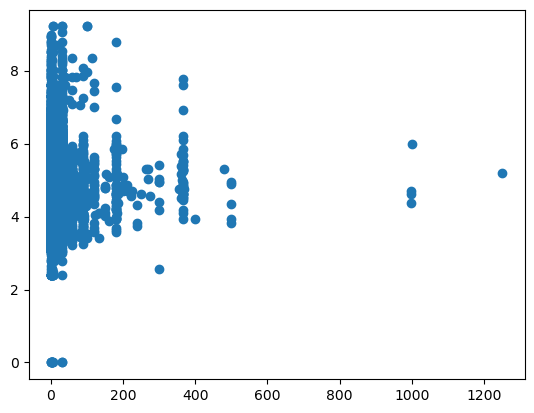

In [80]:
plt.scatter(df_keep['minimum_nights'], df_keep['log_price'])
plt.show()

In [81]:
del df_keep['minimum_nights']

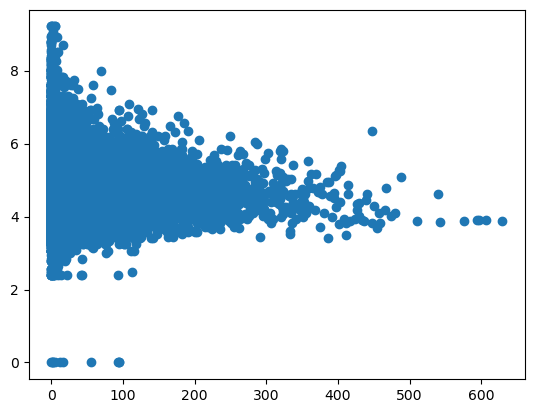

In [83]:
plt.scatter(df_keep['number_of_reviews'], df_keep['log_price'])
plt.show()

In [84]:
df_keep

,room_type,id,price,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,log_price
0,private_room,2539,149,9,0.21,6,365,5.010635
1,entire_home/apt,2595,225,45,0.38,2,355,5.420535
2,private_room,3647,150,0,0.00,1,365,5.017280
3,entire_home/apt,3831,89,270,4.64,1,194,4.499810
4,entire_home/apt,5022,80,9,0.10,1,0,4.394449
...,...,...,...,...,...,...,...,...
48890,private_room,36484665,70,0,0.00,2,9,4.262680
48891,private_room,36485057,40,0,0.00,2,36,3.713572
48892,entire_home/apt,36485431,115,0,0.00,1,27,4.753590
48893,shared_room,36485609,55,0,0.00,6,2,4.025352


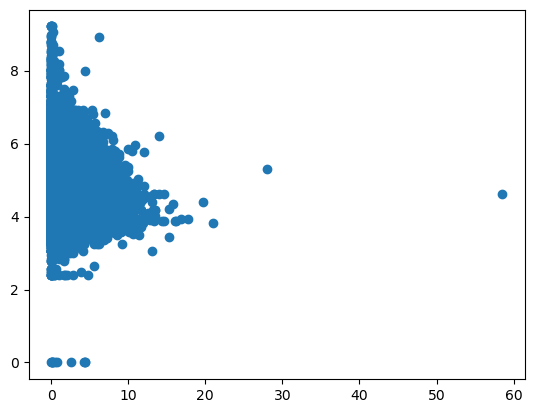

In [85]:
plt.scatter(df_keep['reviews_per_month'], df_keep['log_price'])
plt.show()

In [86]:
del df_keep['reviews_per_month']

In [87]:
df_keep

,room_type,id,price,number_of_reviews,calculated_host_listings_count,availability_365,log_price
0,private_room,2539,149,9,6,365,5.010635
1,entire_home/apt,2595,225,45,2,355,5.420535
2,private_room,3647,150,0,1,365,5.017280
3,entire_home/apt,3831,89,270,1,194,4.499810
4,entire_home/apt,5022,80,9,1,0,4.394449
...,...,...,...,...,...,...,...
48890,private_room,36484665,70,0,2,9,4.262680
48891,private_room,36485057,40,0,2,36,3.713572
48892,entire_home/apt,36485431,115,0,1,27,4.753590
48893,shared_room,36485609,55,0,6,2,4.025352


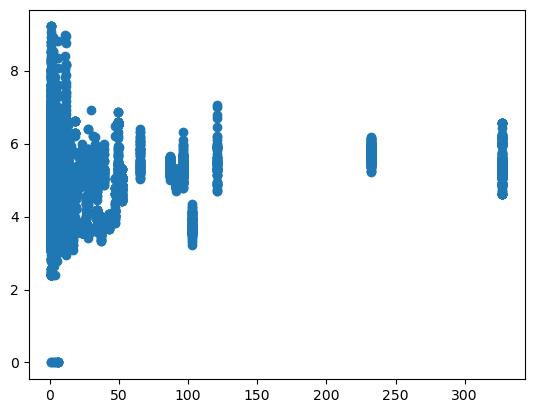

In [88]:
plt.scatter(df_keep['calculated_host_listings_count'], df_keep['log_price'])
plt.show()

In [89]:
del df_keep['calculated_host_listings_count']

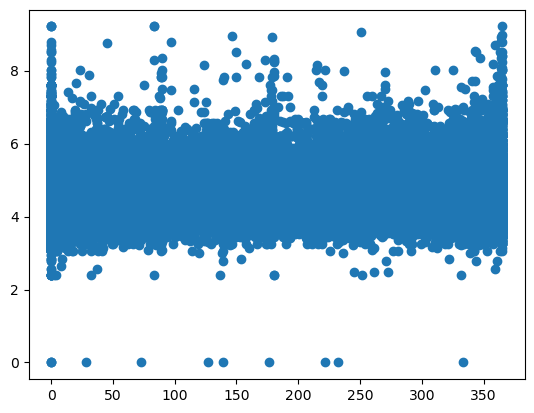

In [90]:
plt.scatter(df_keep['availability_365'], df_keep['log_price'])
plt.show()

In [91]:
df_keep

,room_type,id,price,number_of_reviews,availability_365,log_price
0,private_room,2539,149,9,365,5.010635
1,entire_home/apt,2595,225,45,355,5.420535
2,private_room,3647,150,0,365,5.017280
3,entire_home/apt,3831,89,270,194,4.499810
4,entire_home/apt,5022,80,9,0,4.394449
...,...,...,...,...,...,...
48890,private_room,36484665,70,0,9,4.262680
48891,private_room,36485057,40,0,36,3.713572
48892,entire_home/apt,36485431,115,0,27,4.753590
48893,shared_room,36485609,55,0,2,4.025352


In [92]:
from sklearn.model_selection import train_test_split
df_, df_test = train_test_split(df_keep, test_size=0.2,
                               random_state = 1)
df_train, df_val = train_test_split(df_, test_size = 0.25, 
                                    random_state=1)

df_train.shape, df_test.shape, df_val.shape

((29337, 6), (9779, 6), (9779, 6))

In [94]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

y_train = df_train['log_price']
y_test = df_test['log_price']
y_val = df_val['log_price']


del df_train['price']
del df_train['log_price']

del df_test['price']
del df_test['log_price']

del df_val['price']
del df_val['log_price']

In [95]:
dv = DictVectorizer(sparse=False)

In [96]:
df_train_dicts = df_train.to_dict(orient="records")

In [97]:
X_train = dv.fit_transform(df_train_dicts)

In [98]:
X_train

array([[3.6300000e+02, 1.1574800e+05, 3.0000000e+01, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 2.6155827e+07, 2.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.1300000e+02, 2.6837745e+07, 3.3000000e+01, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.7800000e+02, 3.1234360e+07, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.3847244e+07, 1.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.6200000e+02, 1.8094311e+07, 1.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00]])

In [99]:
model = LinearRegression()

In [100]:
model.fit(X_train, y_train)

LinearRegression()

In [101]:
model.coef_

array([ 6.18086864e-04, -4.49261382e-10, -9.82883706e-04,  6.88431015e-01,
       -1.48168888e-01, -5.40262126e-01])

In [102]:
df_val_dicts = df_val.to_dict(orient="records")

In [103]:
X_val = dv.transform(df_val_dicts)

In [104]:
y_val_pred = model.predict(X_val)

In [105]:
np.sqrt(mean_squared_error(y_val_pred, y_val))

0.5392822191895488